In [1]:
from IPython import display
import matplotlib

import matplotlib.pyplot as plt
from collections import namedtuple
from torch.utils.tensorboard import SummaryWriter
import numpy as np
from stable_baselines3 import SAC
from stable_baselines3.common.callbacks import BaseCallback
from stable_baselines3.common.logger import TensorBoardOutputFormat
from stable_baselines3.common.vec_env import SubprocVecEnv
from stable_baselines3.common.monitor import Monitor

2025-04-19 05:27:02.561273: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-19 05:27:02.567481: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745040422.574382   13874 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745040422.576483   13874 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1745040422.582197   13874 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

In [2]:
%load_ext tensorboard
%matplotlib inline

In [3]:
import gymnasium as gym

from stable_baselines3 import DQN

env = gym.make("LunarLander-v3", render_mode=None)
env = Monitor(env)

model = DQN("MlpPolicy", env, verbose=1, tensorboard_log='runs')
model.learn(total_timesteps=int(2e7), progress_bar=True)
model.save("models/sb3_dqn_cartpole")

 100% ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 1,999,547/2,000,000  [ 0:11:26 < 0:00:01 , 2,814 it/s ]

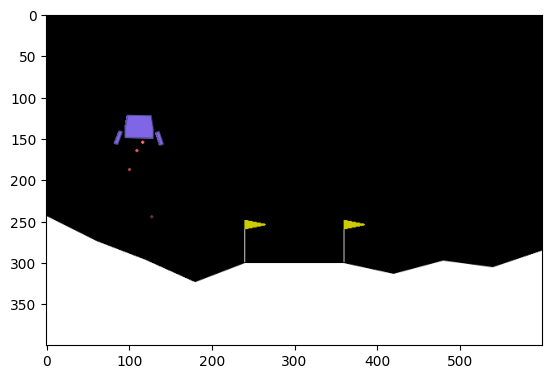

In [ ]:
env = gym.make('LunarLander-v3', render_mode='rgb_array')

obs, info = env.reset()
img = plt.imshow(env.render()) # only call this once

while True:
    action, _states = model.predict(obs, deterministic=True)
    obs, reward, terminated, truncated, info = env.step(action)

    img.set_data(env.render()) # just update the data
    display.display(plt.gcf())
    display.clear_output(wait=True)
    
    if terminated or truncated:
        obs, info = env.reset()